In [2]:
import altair as alt
from pathlib import Path
import json
import pandas as pd
import numpy as np

In [16]:
standard_hls = pd.read_csv("../results/standard/hls/data.csv")
unrolled_hls = pd.read_csv("../results/unrolled/hls/data.csv")
polybench_hls = standard_hls.append(unrolled_hls)
polybench_hls

,benchmark,type,key,value
0,gesummv,hls,total_lut,796
1,gesummv,hls,instance_lut,40
2,gesummv,hls,lut,756
3,gesummv,hls,dsp,12
4,gesummv,hls,avg_latency,532
...,...,...,...,...
72,mvt,hls-unrolled,lut,1353
73,mvt,hls-unrolled,dsp,24
74,mvt,hls-unrolled,avg_latency,421
75,mvt,hls-unrolled,best_latency,421


In [19]:
data = polybench_hls

rename = {
    'avg_latency': 'latency',
}
# keys to keep
include = ['dsp', 'lut', 'latency']

# rename
for k, v in rename.items():
    data.loc[data['key'] == k, 'key'] = v

# only keep things in include
data = data[data['key'].isin(include)].reset_index(drop=True)

data

,benchmark,type,key,value
0,gesummv,hls,lut,756
1,gesummv,hls,dsp,12
2,gesummv,hls,latency,532
3,syr2k,hls,lut,726
4,syr2k,hls,dsp,9
...,...,...,...,...
85,2mm,hls-unrolled,dsp,72
86,2mm,hls-unrolled,latency,2686
87,mvt,hls-unrolled,lut,1353
88,mvt,hls-unrolled,dsp,24


In [20]:
# Take the norm of all the variables
df = data

def match(df, benchmark, typ):
    return df[(df['benchmark'] == benchmark) & (df['type'] == typ)]

for bench in df['benchmark'].unique():
    t = match(df, bench, 'futil').copy()
    t['value'] = match(df, bench, 'futil')['value'].values / match(df, bench, 'hls')['value'].values
    t['type'] = 'norm'
    df = df.append(t).reset_index(drop=True)

df
# df.loc['2mm', 'latency-norm'] = df.loc['2mm', 'LATENCY']['futil'] / df.loc['2mm', 'LATENCY']['hls']
# df

ValueError: operands could not be broadcast together with shapes (0,) (3,) 

In [120]:
df = df.pivot(index=['benchmark', 'type'], columns='name', values='value').reset_index()
df

name,benchmark,type,DSP,LATENCY,LUT
0,2mm,futil,12.000000,15595.000000,4403.000000
1,2mm,hls,12.000000,3718.000000,939.000000
2,2mm,norm,1.000000,4.194459,4.689031
3,3mm,futil,9.000000,17518.000000,527.000000
4,3mm,hls,9.000000,5043.000000,742.000000
5,3mm,norm,1.000000,3.473726,0.710243
6,atax,futil,6.000000,2278.000000,1147.000000
7,atax,hls,6.000000,715.000000,610.000000
8,atax,norm,1.000000,3.186014,1.880328
9,bicg,futil,6.000000,1088.000000,324.000000


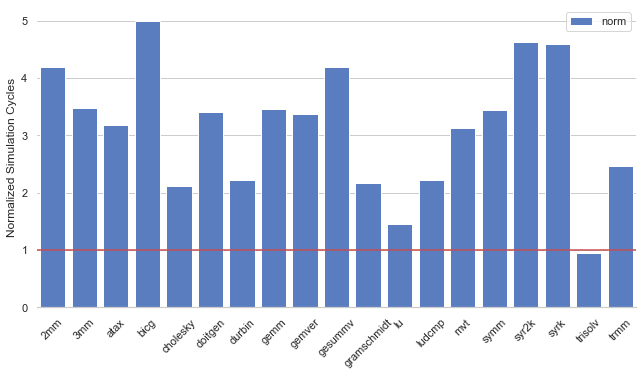

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

g = sns.catplot(
    x="benchmark", 
    y="LATENCY", 
    hue="type", 
    data=df[df['type'] == 'norm'],
    kind="bar", 
    palette="muted",
    legend=False,
)
g.despine(left=True)
g.set_ylabels("Normalized Simulation Cycles")
g.set_xlabels("")
g.set_xticklabels(rotation=45)
g.axes[0,0].legend(loc='upper right').set_title('')
g.axes[0,0].axhline(1, color="r")
g.fig.set_size_inches(10,5)
# g.savefig('log-norm-lat.pdf')

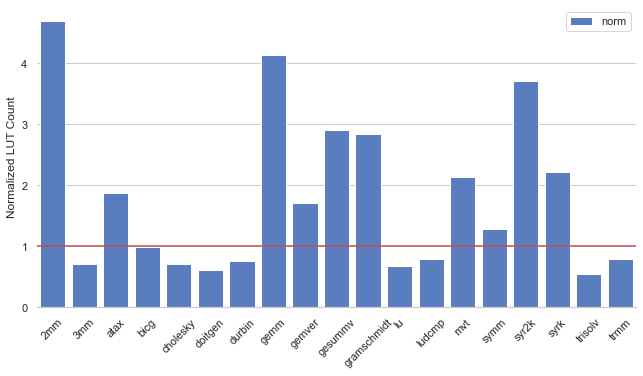

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

g = sns.catplot(
    x="benchmark", 
    y="LUT", 
    hue="type", 
    data=df[df['type'] == 'norm'],
    kind="bar", 
    palette="muted",
    legend=False,
)
g.despine(left=True)
g.set_ylabels("Normalized LUT Count")
g.set_xlabels("")
g.set_xticklabels(rotation=45)
g.axes[0,0].legend(loc='upper right').set_title('')
g.axes[0,0].axhline(1, color="r")
g.fig.set_size_inches(10,5)
# g.savefig('log-norm-lat.pdf')